<a href="https://colab.research.google.com/github/noseda-allison/which-debts-are-worth-the-banks-effort/blob/main/Which_Debts_Are_Worth_the_Bank's_Effort%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Which Debts Are Worth the Bank's Effort?


###Banking Recovery
For this project, we are working on a banking dataset that goes over the data of different recovery strategies at different thresholds. The dataset has the following six features:

`id`

`expected_recovery_amount`

`actual_recovery_amount`

`recovery_strategy`	

`age`	

`sex`

With this given dataset, we will investigate if the extra amount that is recovered at the higher strategy level exceed the extra 50 USD in costs. In other words, was there a jump of more than 50 USD in the amount recovered at the higher strategy level?

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import sklearn
sklearn.__version__ >= '0.20'
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = '.'
PROJECT_ID = 'bank_debt_analysis'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', PROJECT_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, fig_extension='png', tight_layout=True, dpi=300):
  path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
  print('Saving pictures: ', fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, dpi=dpi, format=fig_extension)

path = 'https://raw.githubusercontent.com/noseda-allison/which-debts-are-worth-the-banks-effort/main/bank_data.csv'
banks = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
banks.head(10)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male
5,731,548,520.710,Level 0 Recovery,35,Male
6,221,549,221.585,Level 0 Recovery,33,Male
7,1932,560,373.720,Level 0 Recovery,19,Female
8,1828,562,201.865,Level 0 Recovery,22,Female
9,2001,565,504.885,Level 0 Recovery,27,Male


In [3]:
banks.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f111ee877d0>,
      dtype=object)

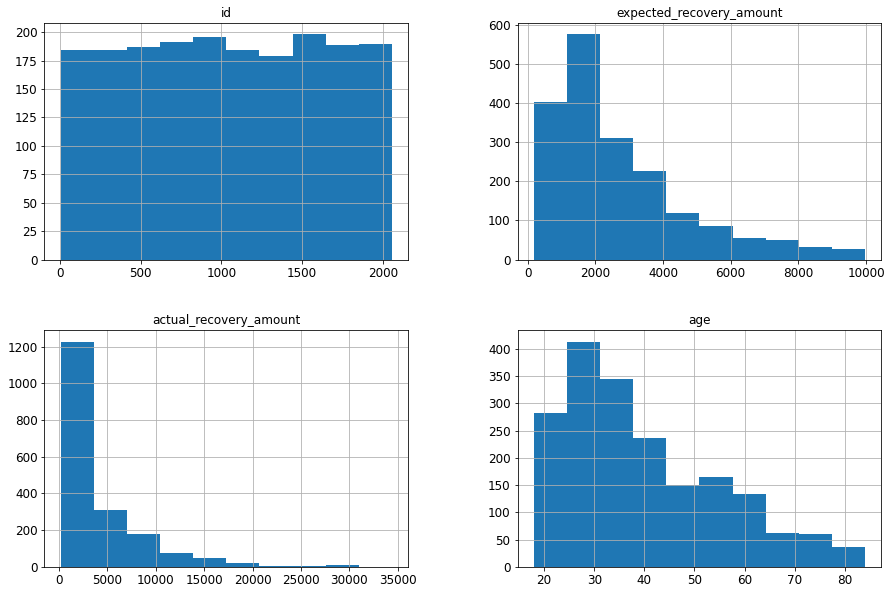

In [4]:
%matplotlib inline
banks.hist(figsize=(15, 10))


As we can see, there are no obvious outliers in the graphs. Also, the attributes are relatively tail-heavy and need to be changed to become more bell shaped because of the scale being different for the values. 

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(banks, banks['recovery_strategy']):
  strat_train_set = banks.loc[train_index]
  strat_test_set = banks.loc[test_index]

strat_test_set['recovery_strategy'].value_counts()/len(strat_test_set)

Level 1 Recovery    0.355438
Level 3 Recovery    0.196286
Level 2 Recovery    0.177719
Level 4 Recovery    0.140584
Level 0 Recovery    0.129973
Name: recovery_strategy, dtype: float64

In [6]:
payback = strat_train_set.copy()

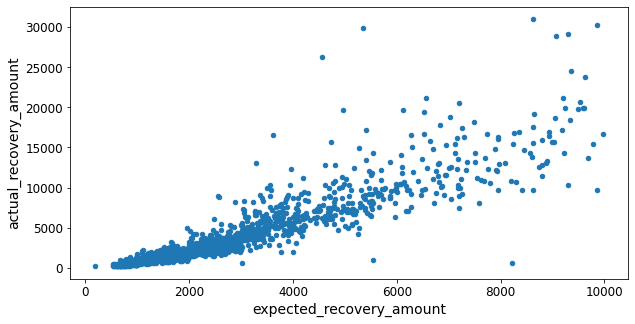

In [7]:
payback.plot(kind='scatter', x='expected_recovery_amount', y='actual_recovery_amount', figsize=(10, 5))

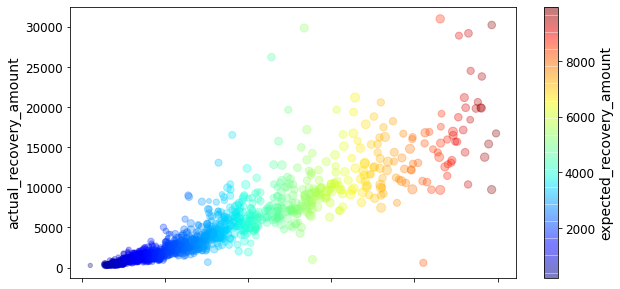

In [8]:
payback.plot(kind='scatter', x='expected_recovery_amount', y='actual_recovery_amount', figsize=(10, 5),
             alpha=0.3, s=payback['age'], c='expected_recovery_amount', cmap=plt.get_cmap('jet'), 
             colorbar=True, legend=True)


After looking at the different graphs above, we can see that the actual recovery amount and the expected recovery amount are very related to each other. Also, the recovery amount is clearly more scattered at the high end compared to the heavy amount in the lower end. Lastly, when it comes to the money, the expected amount is typically below 5000 USD.

In [9]:
corr_matrix = payback.corr()

In [10]:
corr_matrix['actual_recovery_amount'].sort_values(ascending=False)

actual_recovery_amount      1.000000
expected_recovery_amount    0.905771
age                         0.718754
id                         -0.084204
Name: actual_recovery_amount, dtype: float64



Looking at this data, its not a shock that the actual and expected amount of money recovered are positively correlated. This is because the clients will have to pay more as the money expected increases. Something surprising though is how the age of the clients is also really related to the actual amount recovered. So, a client's payment is likely to be more if the client is older. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f111dd7c550>,
      dtype=object)

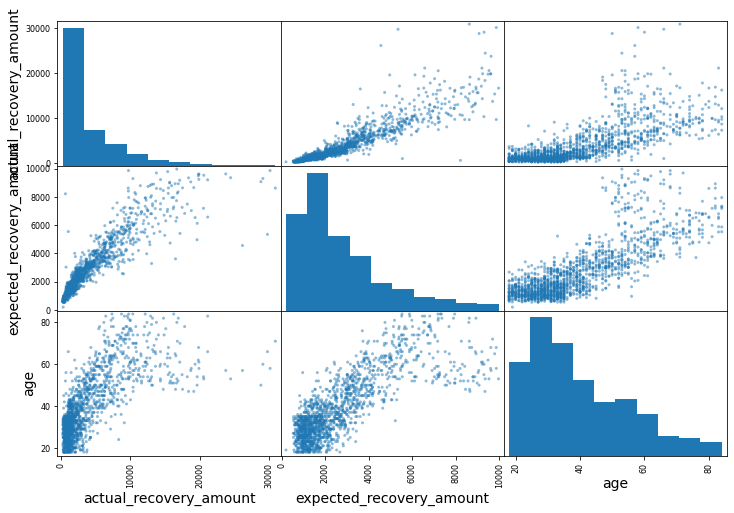

In [11]:
from pandas.plotting import scatter_matrix

num_attributes = ['actual_recovery_amount', 'expected_recovery_amount', 'age']

scatter_matrix(payback[num_attributes], figsize=(12, 8))


This confirms the previous statement of the likely increase in money recovered the older a client is.

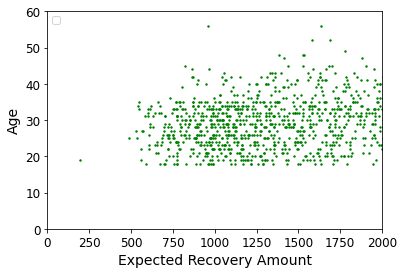

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(x=banks['expected_recovery_amount'], y=banks['age'], c="g", s=2)
plt.xlim(0, 2000)
plt.ylim(0, 60)
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.legend(loc=2)
plt.show()

(0.0, 5000.0)

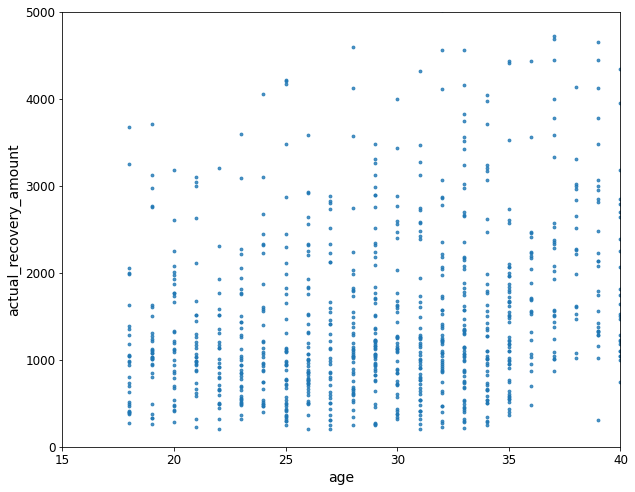

In [13]:
ax=payback.plot(kind='scatter', x='age', y='actual_recovery_amount', figsize=(10, 8),
             alpha=0.8, s=8);
ax.set_xlim((15, 40))
ax.set_ylim((0, 5000))

In [14]:
from scipy import stats

era_900_1100 = banks.loc[(banks['expected_recovery_amount']<1100) & 
                      (banks['expected_recovery_amount']>=900)]
by_recovery_strategy = era_900_1100.groupby(['recovery_strategy'])
by_recovery_strategy['age'].describe().unstack()

Level_0_age = era_900_1100.loc[banks['recovery_strategy']=="Level 0 Recovery"]['age']
Level_1_age = era_900_1100.loc[banks['recovery_strategy']=="Level 1 Recovery"]['age']
stats.kruskal(Level_0_age, Level_1_age)

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

In [15]:
crosstab = pd.crosstab(banks.loc[(banks['expected_recovery_amount']<2000) & 
                              (banks['expected_recovery_amount']>=0)]['recovery_strategy'], 
                       banks['sex'])
print(crosstab)

chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab)
print(p_val)

sex                Female  Male
recovery_strategy              
Level 0 Recovery      108   139
Level 1 Recovery      316   354
0.3941650543686612


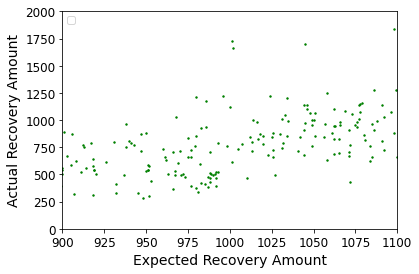

In [16]:
plt.scatter(x=banks['expected_recovery_amount'], y=banks['actual_recovery_amount'], c="g", s=2)
plt.xlim(900, 1100)
plt.ylim(0, 2000)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.legend(loc=2)
plt.show()

In [17]:
by_recovery_strategy['actual_recovery_amount'].describe().unstack()

Level_0_actual = era_900_1100.loc[banks['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']

Level_1_actual = era_900_1100.loc[banks['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(Level_0_actual, Level_1_actual) 

era_950_1050 = banks.loc[(banks['expected_recovery_amount']<1050) & 
                      (banks['expected_recovery_amount']>=950)]

Level_0_actual = era_950_1050.loc[banks['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']

Level_1_actual = era_950_1050.loc[banks['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']

stats.kruskal(Level_0_actual, Level_1_actual)

KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)

In [18]:
X = era_900_1100.expected_recovery_amount
y = era_900_1100.actual_recovery_amount
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Mon, 15 Aug 2022   Prob (F-statistic):           1.56e-13
Time:                            23:17:40   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
banks['indicator_1000'] = np.where(banks['expected_recovery_amount']<1000, 0, 1)
era_900_1100 = banks.loc[(banks['expected_recovery_amount']<1100) & 
                      (banks['expected_recovery_amount']>=900)]

X = era_900_1100.expected_recovery_amount
y = era_900_1100.actual_recovery_amount
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Mon, 15 Aug 2022   Prob (F-statistic):           1.56e-13
Time:                            23:17:40   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
era_950_1050 = banks.loc[(banks['expected_recovery_amount']<1050) & 
                      (banks['expected_recovery_amount']>=950)]

X = era_950_1050[['expected_recovery_amount','indicator_1000']]
y = era_950_1050['actual_recovery_amount']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Mon, 15 Aug 2022   Prob (F-statistic):           1.12e-07
Time:                            23:17:40   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
indicator_1000             286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Conclusion

To conclude, after investigating into the question asked at the beginning, there was an estimated impact of around 280 USD, which is extremely higher than the 50 USD per customer. Even after looking at a few different windows to check our data, the recovery amount is always extremely higher than the 50 USD it costs for the recovery stategy, thus the higher recovery stategy is definitely worth the extra cost of 50 USD per customer.